In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date,timedelta,datetime

In [2]:
driver = webdriver.Firefox(executable_path=r'geckodriver.exe')

<ipython-input-2-8d9f540fd2e0>:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Firefox(executable_path=r'geckodriver.exe')


In [3]:

lluvia_diaria = pd.DataFrame(columns=['fecha_registro','probalidad_lluvia','precipitacion','fecha_pronostico'])
fecha = date.today()
for dia in range(1,91):
    driver.get(f"https://www.accuweather.com/es/cl/santiago/60449/daily-weather-forecast/60449?day={dia}")
    content = driver.page_source
    soup = BeautifulSoup(content)
    tabla = soup.find_all('p', {'class': 'panel-item'})
    for i in tabla:
        value = i.get_text(separator=",").split(",")
        if value[0] == "Probabilidad de precipitación":
            probabilidad = float(value[1].replace("%", ""))/100
        if value[0] == "Precipitaciones":
            precipitaciones = float(value[1].replace("mm", ""))
            break
    fecha_pronostico = fecha+timedelta(days=(dia-1))
    lluvia_diaria.loc[len(lluvia_diaria)] = [fecha, probabilidad,precipitaciones, fecha_pronostico]
lluvia_diaria.to_csv(f'data\lluvia_diaria_{fecha}_{datetime.now().hour}.csv',sep=";",decimal=",",index=False)


In [4]:
lluvia_diaria_23 = pd.read_csv('data/lluvia_diaria_2022-05-23.csv',sep=";",decimal=",")
lluvia_diaria_24 = pd.read_csv('data/lluvia_diaria_2022-05-24.csv',sep=";",decimal=",")
lluvia_diaria_25 = pd.read_csv('data/lluvia_diaria_2022-05-25_2.csv',sep=";",decimal=",")
lluvia_diaria_27_11 = pd.read_csv('data/lluvia_diaria_2022-05-27_11.csv',sep=";",decimal=",")
lluvia_diaria_26_15 = pd.read_csv('data/lluvia_diaria_2022-05-26_15.csv',sep=";",decimal=",")
lluvia_diaria_28_22 = pd.read_csv('data/lluvia_diaria_2022-05-28_22.csv',sep=";",decimal=",")
lluvia_diaria_29_9 = pd.read_csv('data/lluvia_diaria_2022-05-29_15.csv',sep=";",decimal=",")
lluvia_diaria_30_8 = pd.read_csv('data/lluvia_diaria_2022-05-30_8.csv',sep=";",decimal=",")
lluvia_diaria_31_9 = pd.read_csv('data/lluvia_diaria_2022-05-31_9.csv',sep=";",decimal=",")
lluvia_diaria_06_01 = pd.read_csv('data/lluvia_diaria_2022-06-01_9.csv',sep=";",decimal=",")
lluvia_diaria_06_02 = pd.read_csv('data/lluvia_diaria_2022-06-02_10.csv',sep=";",decimal=",")
lluvia_diaria_06_03 = pd.read_csv('data/lluvia_diaria_2022-06-03_12.csv',sep=";",decimal=",")
lluvia_diaria_06_04 = pd.read_csv('data/lluvia_diaria_2022-06-04_13.csv',sep=";",decimal=",")

In [5]:
lluvia_esperada_total = pd.concat([lluvia_diaria_23,lluvia_diaria_24,lluvia_diaria_25,lluvia_diaria_26_15,lluvia_diaria_27_11,
lluvia_diaria_28_22,lluvia_diaria_29_9,lluvia_diaria_30_8,lluvia_diaria_31_9,lluvia_diaria_06_01,lluvia_diaria_06_02,lluvia_diaria_06_03,
lluvia_diaria_06_04])
lluvia_esperada_total.reset_index(drop=True,inplace=True)
lluvia_esperada_total['lluvia_esperada'] = lluvia_esperada_total['probalidad_lluvia']*lluvia_esperada_total['precipitacion']


In [6]:
lluvia_esperada_total['fecha_pronostico'] = lluvia_esperada_total['fecha_pronostico'].astype('datetime64[ns]')

In [7]:
lluvia_esperada_total.groupby(['fecha_registro'])['lluvia_esperada'].sum()

fecha_registro
2022-05-23    87.342
2022-05-24    79.965
2022-05-25    88.967
2022-05-26    70.481
2022-05-27    74.039
2022-05-28    46.573
2022-05-29    46.805
2022-05-30    43.513
2022-05-31    53.058
2022-06-01    36.368
2022-06-02    44.320
2022-06-03    56.585
2022-06-04    48.302
Name: lluvia_esperada, dtype: float64

In [21]:
lluvia_diaria_06_03['fecha_pronostico'] = lluvia_diaria_06_03['probalidad_lluvia']*lluvia_diaria_06_03['precipitacion']
lluvia_diaria_06_03

,fecha_registro,probalidad_lluvia,precipitacion,fecha_pronostico
0,2022-06-03,0.97,10.9,10.573
1,2022-06-03,0.14,0.0,0.000
2,2022-06-03,0.05,0.0,0.000
3,2022-06-03,0.01,0.0,0.000
4,2022-06-03,0.01,0.0,0.000
...,...,...,...,...
85,2022-06-03,0.00,0.0,0.000
86,2022-06-03,0.00,0.0,0.000
87,2022-06-03,0.00,0.0,0.000
88,2022-06-03,0.64,2.3,1.472


In [15]:
lluvia_esperada_total.sort_values('fecha_pronostico',ascending=True)

,fecha_registro,probalidad_lluvia,precipitacion,fecha_pronostico,lluvia_esperada
0,2022-05-23,0.15,0.0,2022-05-23,0.000
90,2022-05-24,0.25,0.0,2022-05-24,0.000
1,2022-05-23,0.25,0.0,2022-05-24,0.000
2,2022-05-23,0.04,0.0,2022-05-25,0.000
91,2022-05-24,0.06,0.0,2022-05-25,0.000
...,...,...,...,...,...
988,2022-06-02,0.00,0.0,2022-08-29,0.000
899,2022-06-01,0.00,0.0,2022-08-29,0.000
989,2022-06-02,0.64,2.3,2022-08-30,1.472
1078,2022-06-03,0.64,2.3,2022-08-30,1.472


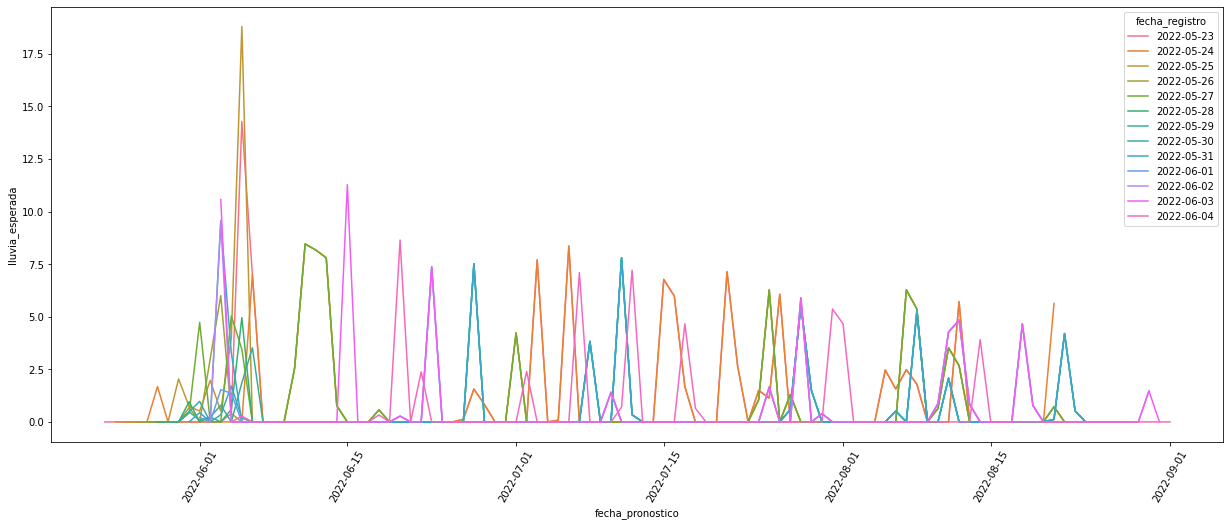

In [8]:
plt.figure(figsize = (21,8))
ax = sns.lineplot(data=lluvia_esperada_total, x='fecha_pronostico',y='lluvia_esperada',hue='fecha_registro')
plt.xticks(rotation=60)
plt.show()

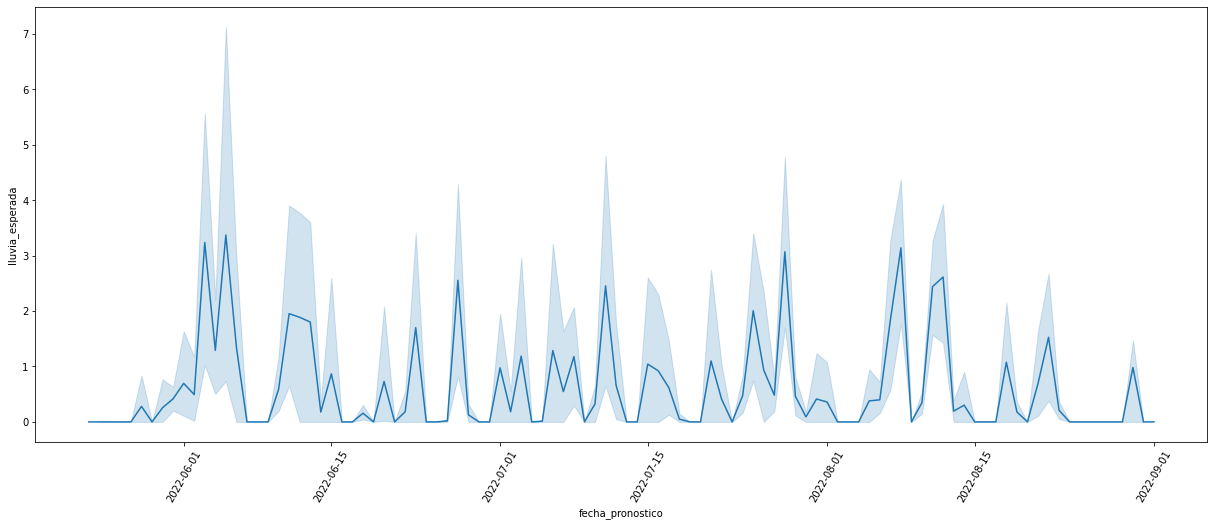

In [9]:
plt.figure(figsize = (21,8))
ax = sns.lineplot(data=lluvia_esperada_total, x="fecha_pronostico", y="lluvia_esperada")
plt.xticks(rotation=60)
plt.show()
